In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

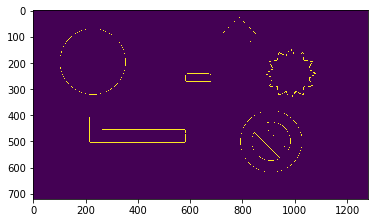

In [7]:
img= cv2.imread('test 01.tif')
canny = cv2.Canny(img,30,70)
height=img.shape[0]
width=img.shape[1]

plt.imshow(canny)
#Edge detection with canny function of opencv

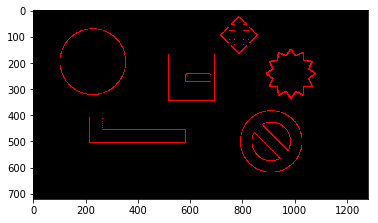

In [8]:
ret, thresh = cv2.threshold(canny,127,255,0)
image, contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#Canny line is too thin to vectorize, so draw contours alongside the canny edges

blank=np.zeros((height,width,3),np.uint8)
img2 = cv2.drawContours(blank, contours, -1, (255,0,0), 2)
#Draw found contours on black image with thickened line

plt.imshow(img2)

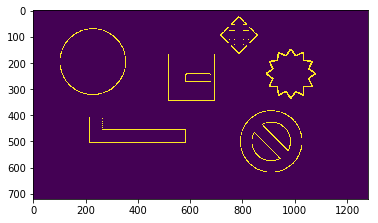

In [9]:
imgray = cv2.cvtColor(image2,cv2.COLOR_RGB2GRAY)
(thresh, im_bw) = cv2.threshold(imgray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
image2, contours2, hierarchy2 = cv2.findContours(im_bw,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(im_bw)

In [11]:
f = open('success1.svg', 'w+')
f.write('<?xml version="1.0" encoding="utf-8"?>')
f.write('<svg version="1.0" id="Layer_1" width="'+str(width)+'" height="'+str(height)+'" xmlns="http://www.w3.org/2000/svg" xml:space="preserve">')
f.write('<path d="')

for i in range(len(contours2)):
    f.write('M')
    for j in range(len(contours2[i])):
        x,y = contours2[i][j][0]
        f.write(str(x)+  ' ' + str(y)+' ')
    f.write('Z'+' ')

f.write('"/>')
f.write('</svg>')
f.close()